## Objective:

**Perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.**

# Importing Necessary Packages:

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset using Pandas package read_csv to read csv files.**

In [380]:
# Storing the dataset in a variable name df
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


## Performing EDA on the dataset for cleaning, preparation and gain any insights we can:

In [382]:
# Information of the dataset:
df.info()
# Data has no null values
# All the datatypes are correct
# There are total of 11 columns and 1436 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [383]:
# Shape of the data:
df.shape

(1436, 11)

In [384]:
# These are all the columns in the dataset:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight'], dtype='object')

In [385]:
# Let's check few stats of the data:
df.describe()

# checking on the data below:
# - There are a few indications of outliers in some columns like - 'Price', 'KM', 'cc' as Price of 32500 seems relatively high
#   compared to the rest of the data.
# - Whereas KM of 243000 seems extreme but again it depends on the usage of the car, however; will check for outliers properly going forward
# - 'cc' minimum value shows 1300 , however; maximum value of 16000 could mean it is an outlier as most cars have 'cc' of 1000cc to 5000cc

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


**Checking if the dataset contains any null values**

In [387]:
# Using this line of code shows us if any of the columns in the dataset contains null values
df.isnull().sum()
# As shown below, the dataset is free of any null entries, hence, doesn't require treating missing values

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

**Checking for duplicate entries**

In [389]:
# Finding duplicated values in the data:
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [390]:
# As we got a duplicated row, will filter using the Price column to check with which another row it's duplicating:
df[df.Price == 24950]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [391]:
# Will drop Row 113 as it's a duplicate entry in the data:
df.drop_duplicates(inplace=True)

In [392]:
# Any/All duplicate rows were dropped and using inplace=True marks it permanent on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1435 non-null   int64 
 1   Age_08_04  1435 non-null   int64 
 2   KM         1435 non-null   int64 
 3   Fuel_Type  1435 non-null   object
 4   HP         1435 non-null   int64 
 5   Automatic  1435 non-null   int64 
 6   cc         1435 non-null   int64 
 7   Doors      1435 non-null   int64 
 8   Cylinders  1435 non-null   int64 
 9   Gears      1435 non-null   int64 
 10  Weight     1435 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 134.5+ KB


## Let's check the dataset for any outliers:

In [394]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [395]:
# Since the dataset contains a column with datatype as String
# We will temporary drop that column and calculate Q1,Q3 and IQR to find outliers in remaining numeric columns

df_num = df.select_dtypes(include=['number'])
df_num.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170


In [396]:
# Now let's calculate Q1 and Q3 values:

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
print(f'Value for first quartile(Q1):\n{Q1}\n\nValue for third quartile(Q3):\n{Q3}')

Value for first quartile(Q1):
Price         8450.0
Age_08_04       44.0
KM           43000.0
HP              90.0
Automatic        0.0
cc            1400.0
Doors            3.0
Cylinders        4.0
Gears            5.0
Weight        1040.0
Name: 0.25, dtype: float64

Value for third quartile(Q3):
Price        11950.0
Age_08_04       70.0
KM           87041.5
HP             110.0
Automatic        0.0
cc            1600.0
Doors            5.0
Cylinders        4.0
Gears            5.0
Weight        1085.0
Name: 0.75, dtype: float64


In [397]:
# As Values for outliers are alot and bigger , we can set display options to maximum for better readability and viewing via pandas
pd.set_option('display.max_colwidth', None)  # Don't truncate column content
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', 1000)        # Expand width for better readability

In [398]:
# Creating a function to automate calculating outlier values in the data:

def quartile(data,column):
    interquartilerange = {}

    for col in column:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        Upper_outlier = data[col][data[col] > Q3 + 1.5*IQR].values
        Lower_outlier = data[col][data[col] < Q1 - 1.5*IQR].values

        interquartilerange[col] = {'Upper_outlier':Upper_outlier.tolist(),
                                   'Lower_outlier':Lower_outlier.tolist()}

    IQRange = pd.DataFrame(interquartilerange).T

    return IQRange

In [399]:
quartile(df_num,df_num.columns)

,Upper_outlier,Lower_outlier
Price,"[18600, 21500, 20950, 19950, 19600, 21500, 22500, 22000, 22750, 17950, 17495, 17950, 19000, 17950, 17950, 21950, 17950, 20500, 21950, 18950, 18750, 17950, 17950, 18950, 22250, 18950, 19950, 18750, 18450, 18950, 17250, 17950, 17450, 17950, 21950, 22250, 19950, 18900, 19950, 18750, 17450, 18990, 18500, 18500, 19450, 18800, 17450, 17950, 32500, 31000, 31275, 24950, 22950, 24990, 21950, 17900, 19250, 22250, 18950, 19950, 18950, 21750, 17950, 18450, 23000, 19900, 23950, 19950, 18500, 18950, 20500, 24500, 19450, 20950, 19950, 18450, 19500, 21750, 19500, 18900, 19750, 19750, 18950, 20750, 19600, 19500, 17650, 19950, 19950, 20950, 20500, 17795, 18245, 23750, 19500, 18950, 21950, 19950, 18950, 19950, ...]",[]
Age_08_04,[],"[4, 4, 4, 2, 2, 1, 1]"
KM,"[243000, 180638, 179860, 178858, 161000, 158320, 216000, 198167, 176000, 174139, 174000, 205000, 204250, 194545, 190900, 183500, 176184, 174833, 155720, 155500, 154783, 154462, 232940, 218118, 217764, 207114, 203254, 200732, 197501, 194765, 191620, 183277, 180378, 178800, 176177, 176000, 172980, 170000, 164000, 161775, 160000, 159968, 159908, 158492, 156204, 156169, 155210, 155000, 154900]",[]
HP,"[192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192]",[]
Automatic,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",[]
cc,"[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 16000, 2000, 2000, 2000, 1995, 1995, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1975, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, ...]",[]
Doors,[],[]
Cylinders,[],[]
Gears,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]","[3, 3, 4]"
Weight,"[1165, 1165, 1165, 1165, 1170, 1170, 1245, 1245, 1185, 1185, 1185, 1185, 1185, 1185, 1185, 1185, 1170, 1255, 1255, 1270, 1255, 1255, 1195, 1255, 1180, 1195, 1165, 1180, 1275, 1180, 1180, 1245, 1265, 1260, 1260, 1260, 1155, 1480, 1480, 1480, 1320, 1270, 1280, 1270, 1255, 1275, 1255, 1320, 1185, 1165, 1180, 1160, 1205, 1205, 1205, 1170, 1615, 1165, 1205, 1165, 1260, 1260, 1155, 1480, 1172]",[]


**Age_08_04 (Lower outliers):**

**Reason: Cars with unrealistically low ages (e.g., 1-2 years) may be data entry errors or rare cases that don't fit the general dataset.**

**Action: Filtering out ages below a reasonable threshold like - below 5 years**

**KM (Upper outliers):**

**Reason: Extremely high mileage values like = 243000 km are rare and might be outliers, as most cars don't reach such high mileage.**

**Action: Filtering out mileage values that exceed a logical upper bound for the dataset**

**cc (Cylinder Volume in cubic centimeters):**

**Reason: Extremely high cc value like = 16000 is clearly an outlier value as even the high end car of the world has less 10000 cc value**

**Action: Filtering out cc value below or equal to 2000 for this dataset is better**

**There are other columns showing outlier values, however; those values naturally vary in world and leaving them as it is better,
for the model to learn on**

**Like - Price,HP,Automatic,Gears and Weight**

In [404]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


**Calculated outliers , however; now we will visualize outliers for the columns that needs to be treated**

**and for that we will create a function that will loop through the columns and give the boxplot visual**

In [406]:
def plotiqr(data,columns):
    # Loop through each column in the list of columns provided
    for col in columns:
        Q1 = data[col].quantile(0.25)    # Calculate the 1st quartile (25th percentile) of the column
        Median = data[col].median()      # Calculate the median (50th percentile) of the column
        Q3 = data[col].quantile(0.75)    # Calculate the 3rd quartile (75th percentile) of the column
        
        spacing = 0.75                   # Set spacing for placement of text annotations on the plot
        
        plt.figure(figsize=(8,6))        # Create a new figure with a specified size
        sns.boxplot(y = data[col],color = 'lightgreen')    # Create a boxplot for the column data using seaborn
        
        # Add a text annotation for Q1 (25th percentile), positioned slightly below the box
        plt.text(-0.35,Q1 - spacing,f'Q1: {Q1}', ha = 'left', va = 'bottom',fontsize = 10,color = 'black')

        # Add a text annotation for the Median (50th percentile), positioned on the median line
        plt.text(0,Median,f'Median: {Median}',ha = 'center', va = 'bottom',fontsize = 10,color = 'black')

        # Add a text annotation for Q3 (75th percentile), positioned slightly above the box
        plt.text(+0.35,Q3 + spacing,f'Q3: {Q3}',ha = 'right', va = 'bottom',fontsize = 10,color = 'black')

        
        plt.title(f'Boxplot of {col}')   # Set the title of the plot using the column name
        plt.show()                       # Display the boxplot

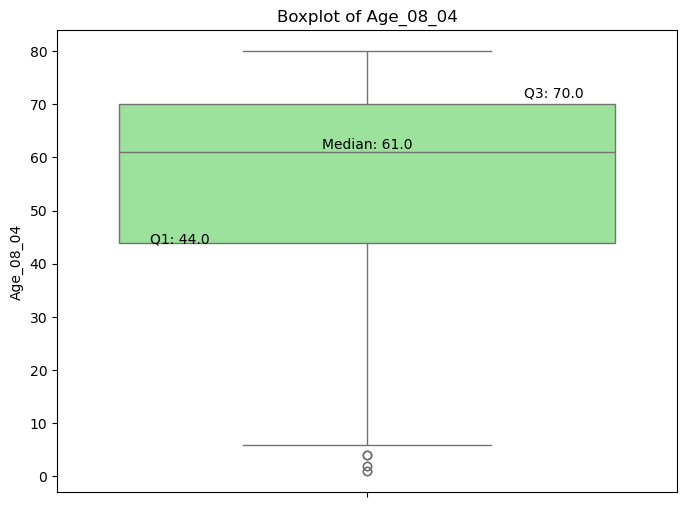

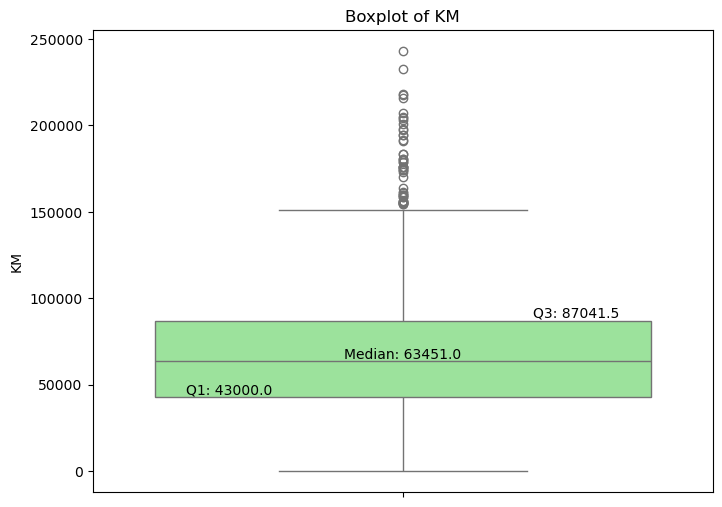

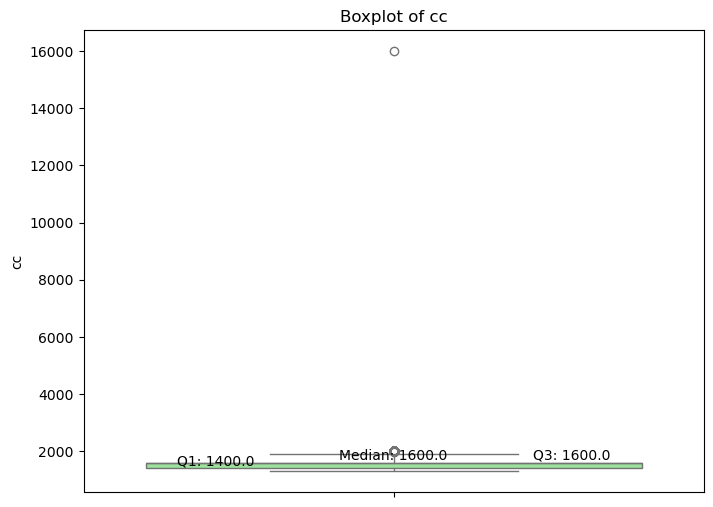

In [407]:
# This boxplot will show columns with outlier values ( only columns that needs to be treated ):
plotiqr(df_num,['Age_08_04','KM','cc'])

In [408]:
# As these are the columns that needs to be treated of outliers, we will filter out the values and store in variable df_filtered:
df_filtered = df[(df.Age_08_04 >= 5) & (df.KM <= 100000) & (df.cc <= 1900)]
df_filtered

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105
10,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
13,21500,31,23000,Petrol,192,0,1800,3,4,6,1185
14,22500,32,34131,Petrol,192,0,1800,3,4,6,1185
15,22000,28,18739,Petrol,192,0,1800,3,4,6,1185
16,22750,30,34000,Petrol,192,0,1800,3,4,5,1185
17,17950,24,21716,Petrol,110,0,1600,3,4,5,1105


In [409]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1138 entries, 8 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1138 non-null   int64 
 1   Age_08_04  1138 non-null   int64 
 2   KM         1138 non-null   int64 
 3   Fuel_Type  1138 non-null   object
 4   HP         1138 non-null   int64 
 5   Automatic  1138 non-null   int64 
 6   cc         1138 non-null   int64 
 7   Doors      1138 non-null   int64 
 8   Cylinders  1138 non-null   int64 
 9   Gears      1138 non-null   int64 
 10  Weight     1138 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 106.7+ KB


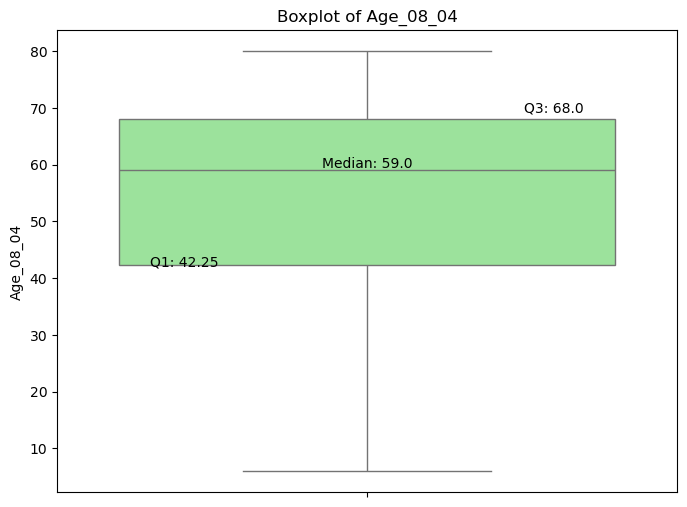

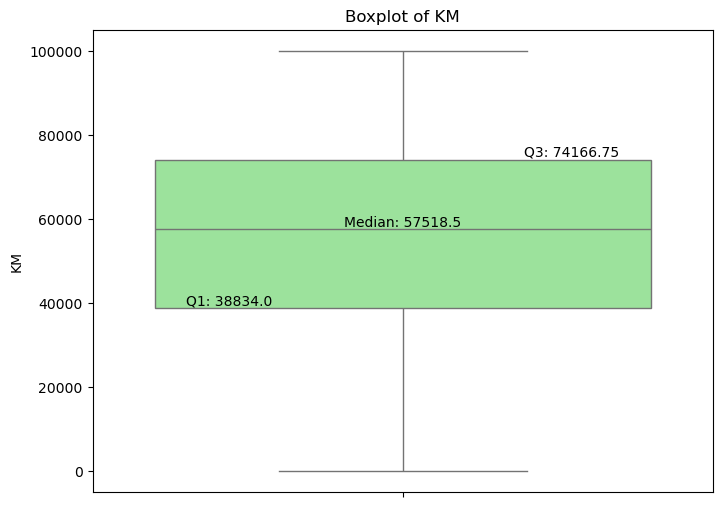

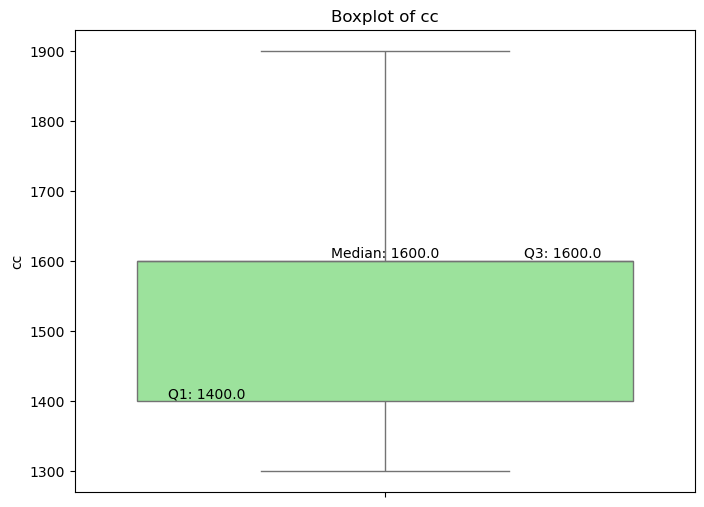

In [410]:
# This will show the dataset treated of outliers:
plotiqr(df_filtered,['Age_08_04','KM','cc'])

In [411]:
df_filtered.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.0,1138.000000,1138.000000
mean,10963.025483,55.035149,56028.742531,103.943761,0.064148,1521.794376,4.026362,4.0,5.027241,1063.541301
std,3308.201450,18.292950,23012.610614,13.455958,0.245123,133.110411,0.952342,0.0,0.197066,40.015702
min,5845.000000,6.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8750.000000,42.250000,38834.000000,97.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1035.000000
50%,9950.000000,59.000000,57518.500000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1060.000000
75%,11950.000000,68.000000,74166.750000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1075.000000
max,24500.000000,80.000000,99971.000000,192.000000,1.000000,1900.000000,5.000000,4.0,6.000000,1615.000000


In [412]:
# Now since we treated the dataset of outliers(only columns that actually act as outliers), we will apply this change onto the main df variable:
df = df[(df.Age_08_04 >= 5) & (df.KM <= 100000) & (df.cc <= 1900)]
df = df.reset_index(drop=True) # Reset the index to start from 0 itself instead of in between row number
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
1,12950,23,71138,Diesel,69,0,1900,3,4,5,1105
2,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
3,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
4,19600,25,32189,Petrol,192,0,1800,3,4,6,1185


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1138 non-null   int64 
 1   Age_08_04  1138 non-null   int64 
 2   KM         1138 non-null   int64 
 3   Fuel_Type  1138 non-null   object
 4   HP         1138 non-null   int64 
 5   Automatic  1138 non-null   int64 
 6   cc         1138 non-null   int64 
 7   Doors      1138 non-null   int64 
 8   Cylinders  1138 non-null   int64 
 9   Gears      1138 non-null   int64 
 10  Weight     1138 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 97.9+ KB


## Data Visualization

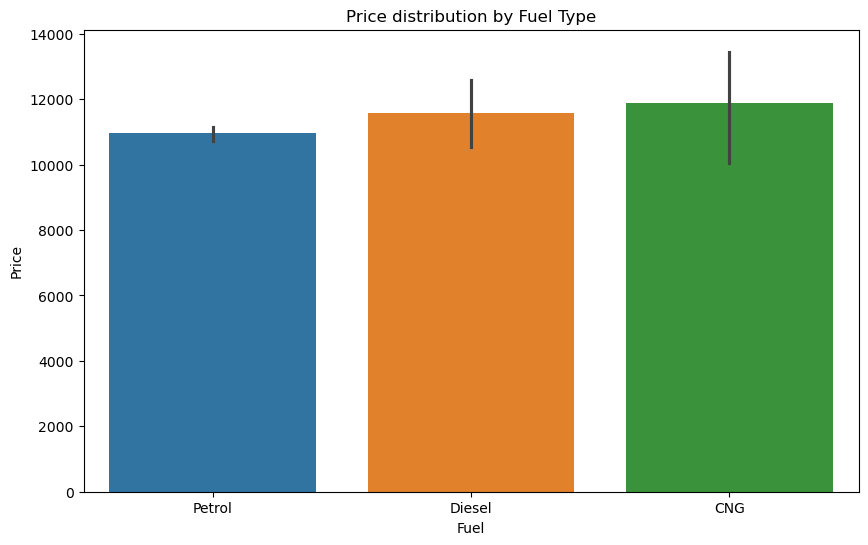

In [415]:
# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a barplot to visualize the relationship between 'Fuel_Type' and 'Price'
# x='Fuel_Type' places fuel type on the x-axis
# y='Price' places price on the y-axis
# data=df specifies the dataframe we're using
# hue='Fuel_Type' adds a color distinction by fuel type
sns.barplot(x='Fuel_Type', y='Price', data=df, hue='Fuel_Type')

# Set the label for the x-axis to 'Fuel'
plt.xlabel('Fuel')

# Set the label for the y-axis to 'Price'
plt.ylabel('Price')

# Title of the plot
plt.title('Price distribution by Fuel Type')

# Display the plot
plt.show()

<Figure size 1000x500 with 0 Axes>

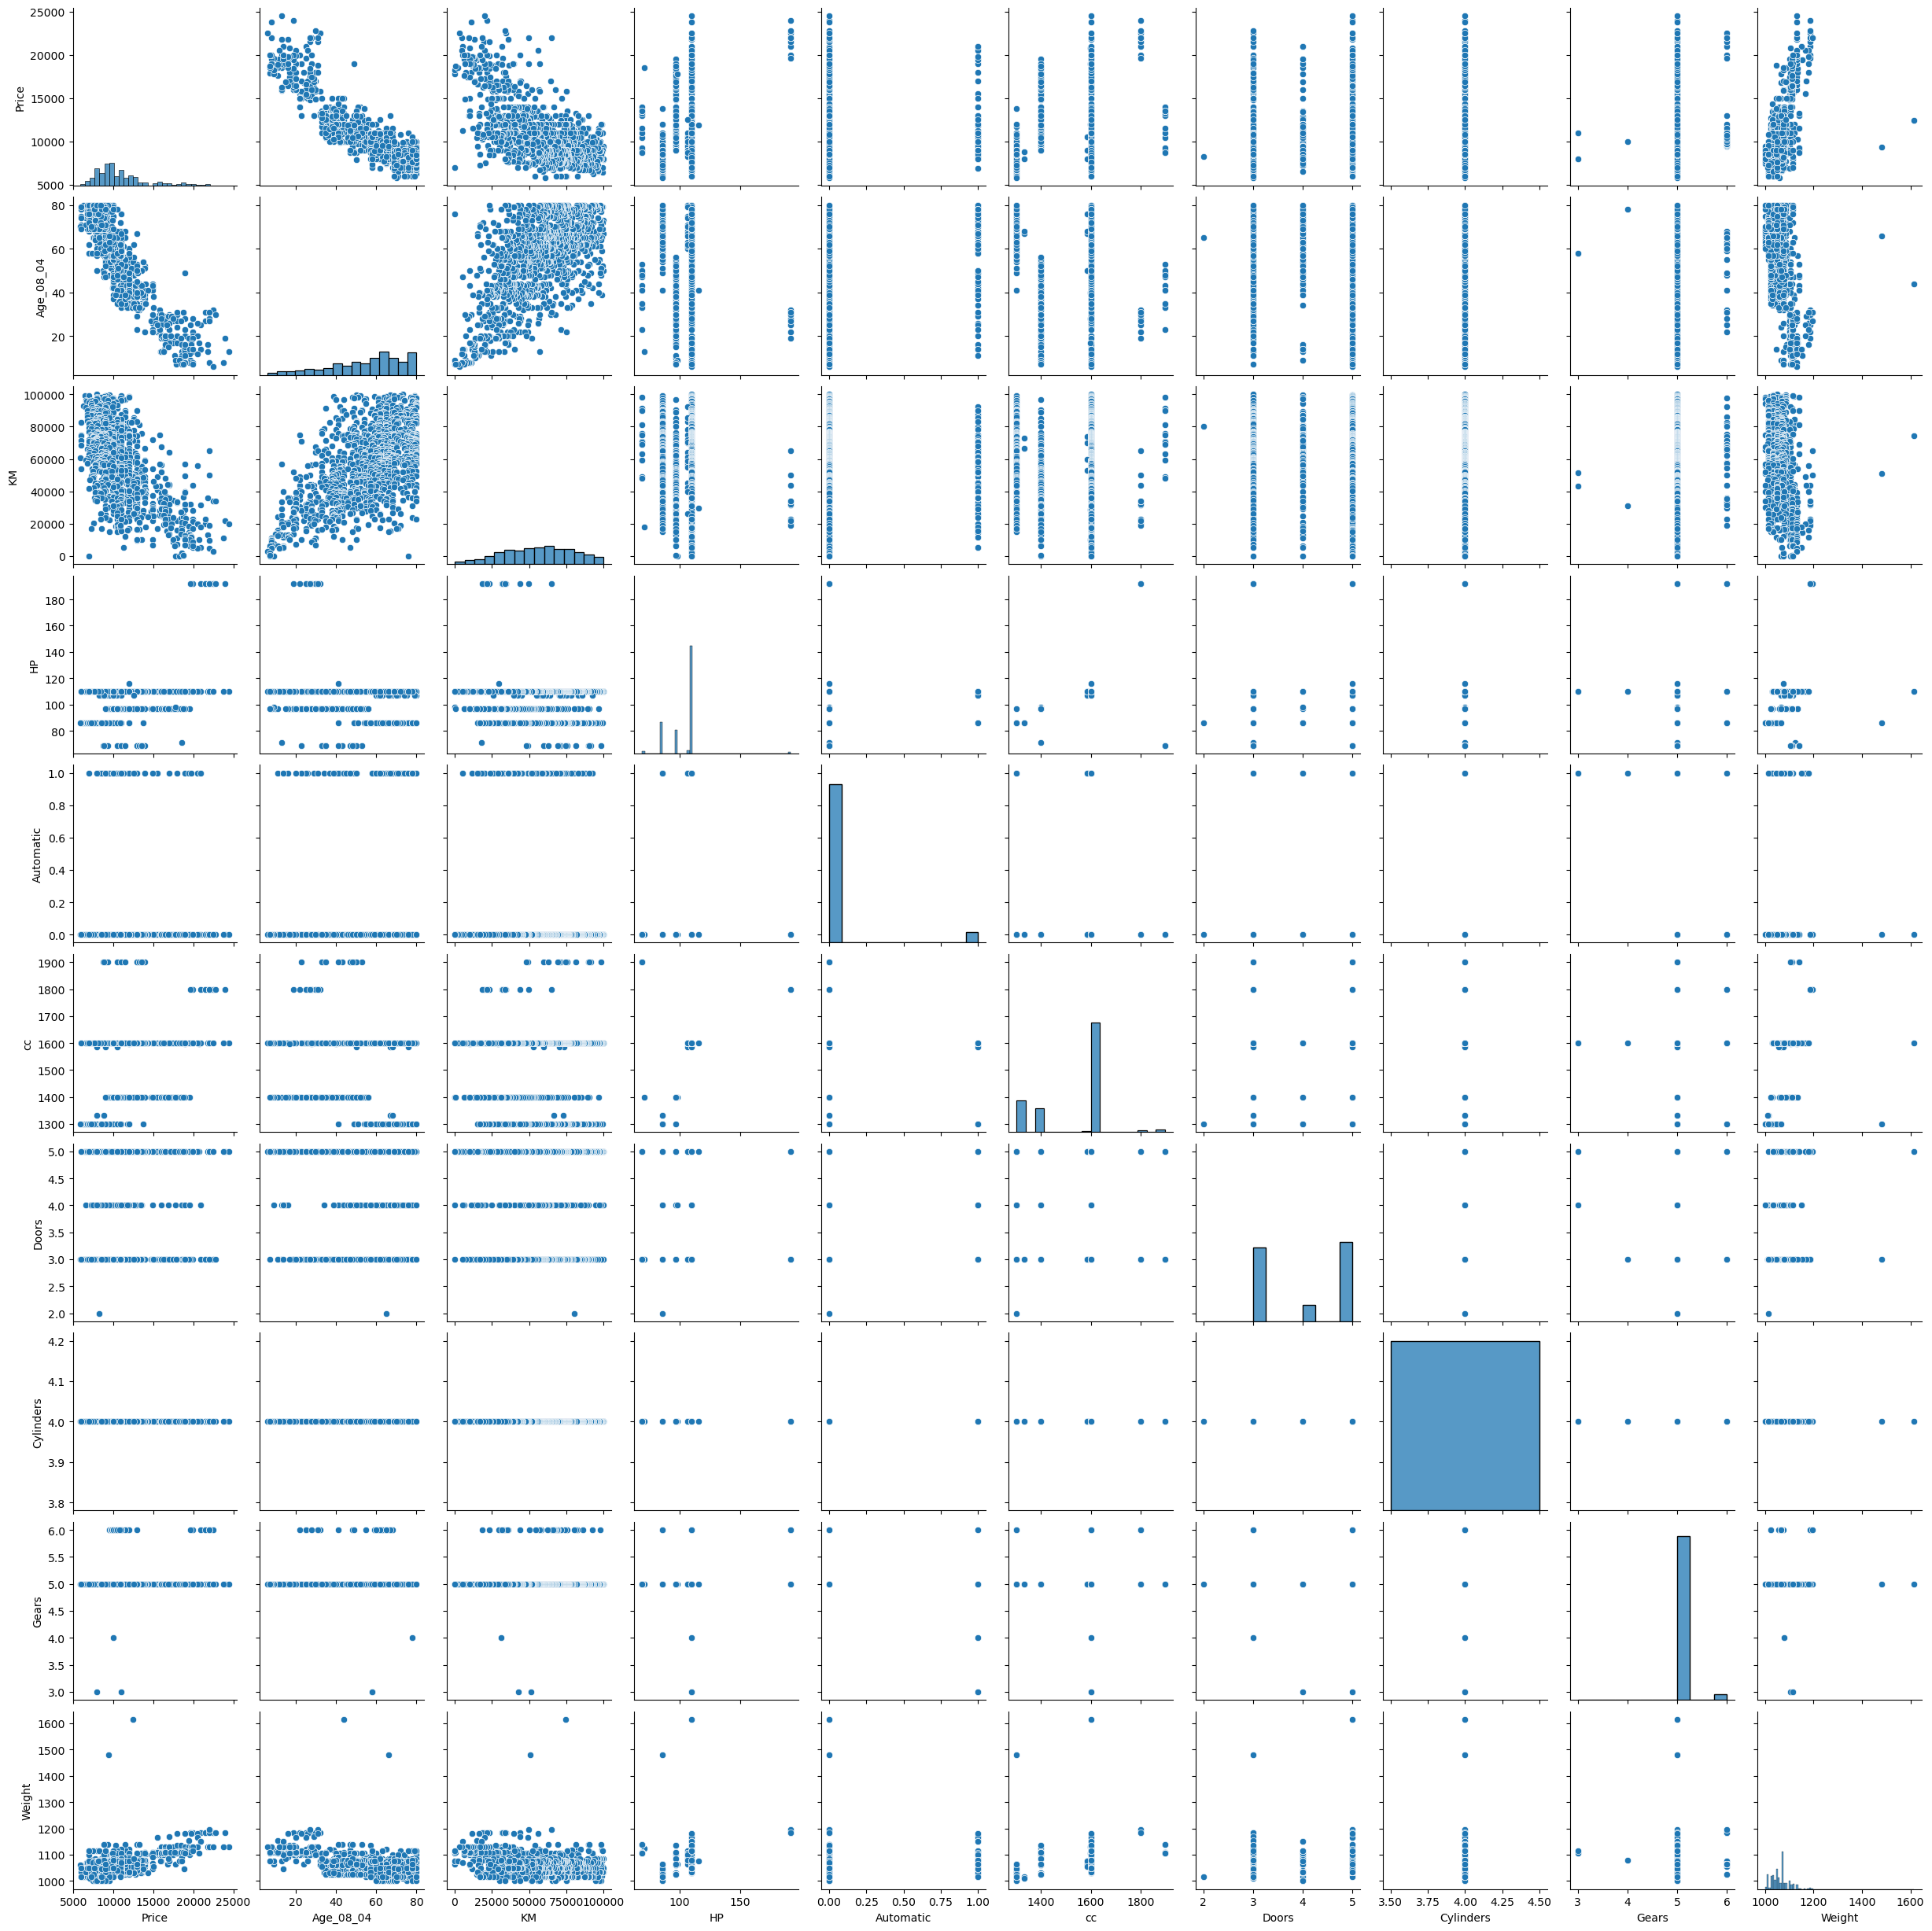

In [416]:
# Set up the figure size for the plot
plt.figure(figsize=(10,5))

# Create a pairplot to visualize any relation between two variable
sns.pairplot(df)

# Display the plot
plt.show()

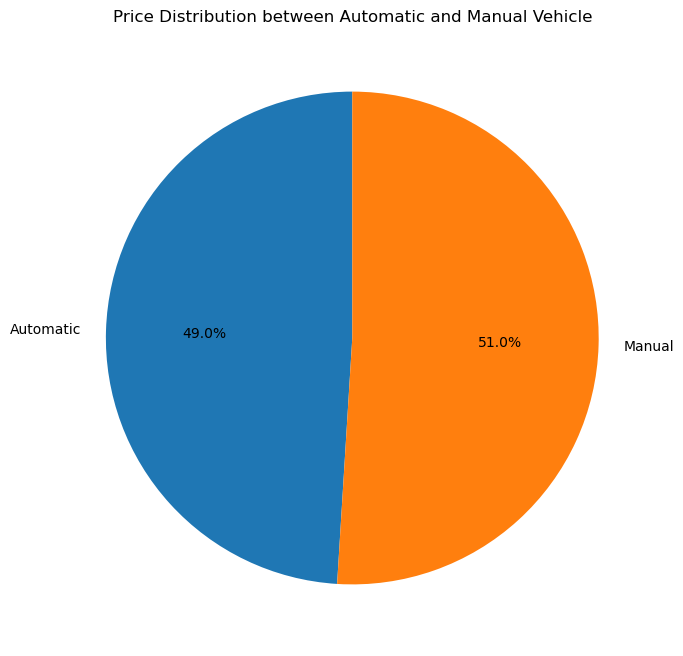

In [417]:
# Calculate avg price for automatic = 1 (Yes) and non-automatic = 0 (No) vehicle
auto_prices = df.groupby('Automatic')['Price'].mean()

# Create a pie Chart
plt.figure(figsize=(8,8))
plt.pie(auto_prices,labels=['Automatic','Manual'],autopct='%1.1f%%',startangle=90)

# Chart Title
plt.title('Price Distribution between Automatic and Manual Vehicle')

# Display the chart
plt.show()

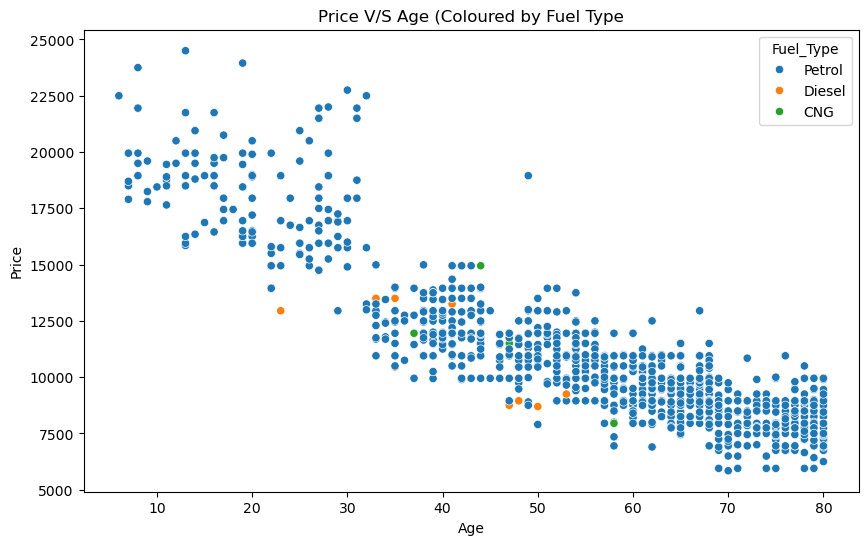

In [418]:
# Create a scatterplot between Price and Age with fuel type of the vehicles

# Set up the figure of the chart
plt.figure(figsize=(10,6))

# Create a scatterplot with labels
sns.scatterplot(x = 'Age_08_04', y = 'Price', hue = 'Fuel_Type', data = df)

# Title of the chart
plt.title('Price V/S Age (Coloured by Fuel Type')

# Giving labels to the chart
plt.xlabel('Age')
plt.ylabel('Price')

# Display the chart
plt.show()

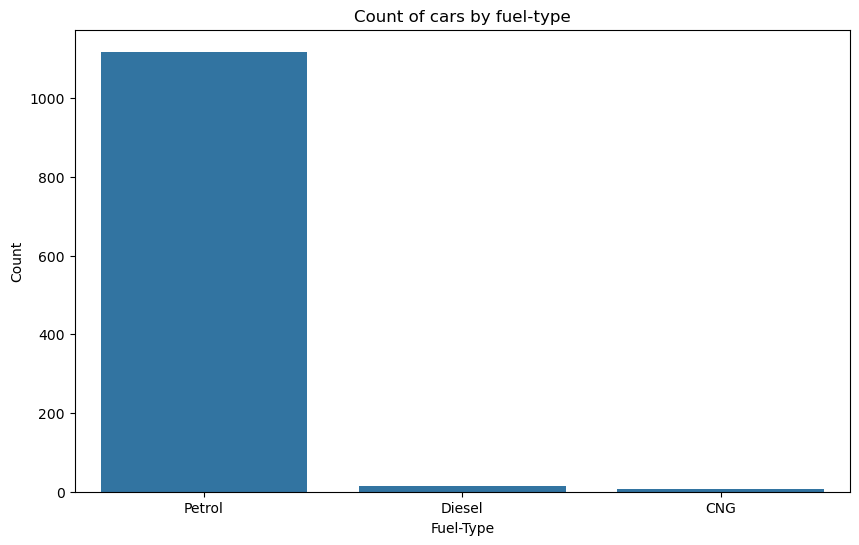

In [419]:
# Creating a countplot of Cars by Fuel type

# Set the fig size
plt.figure(figsize=(10,6))

# Create plot
sns.countplot(x = 'Fuel_Type', data = df)

# Labelling and title of the chart
plt.title('Count of cars by fuel-type')
plt.xlabel('Fuel-Type')
plt.ylabel('Count')

# Display the plot
plt.show()

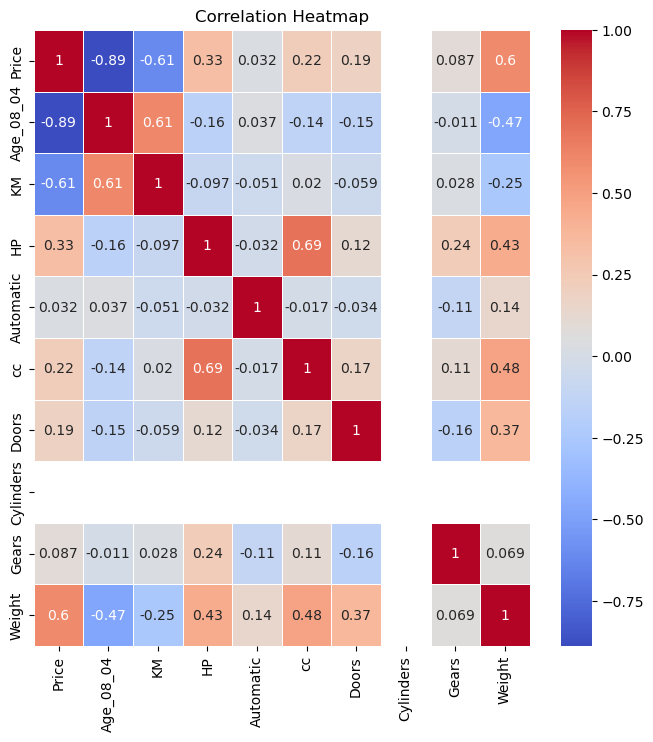

In [420]:
# Let's create a heatmap to check any correlations between variables

# Need to select only numeric data
df_cor = df.select_dtypes(include=['number'])

# Correlation
cor = df_cor.corr()

# Set the figure size
plt.figure(figsize=(8,8))

# Plot the map
sns.heatmap(cor,annot=True,cmap='coolwarm',linewidths=0.5)

# Plot title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

**There is multicollinearity between the variables, however; we will engineer this ahead in the notebook**

## Converting Categorical data into Numeric (Preprocessing)

In [422]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()

In [423]:
oh_fuel = oh.fit_transform(df[['Fuel_Type']]).toarray()

In [424]:
feature_names = oh.get_feature_names_out()

In [425]:
feature_names

array(['Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype=object)

In [426]:
oh_df = pd.DataFrame(oh_fuel,columns = feature_names)
oh_df

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,0.0,1.0


In [427]:
# Once we have applied one hot encoding on the categorical column, we will concatenate this with the main dataframe

df = pd.concat([df,oh_df],axis = 1).drop(columns = ['Fuel_Type'])
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,21500,27,19700,192,0,1800,3,4,5,1185,0.0,0.0,1.0
1,12950,23,71138,69,0,1900,3,4,5,1105,0.0,1.0,0.0
2,20950,25,31461,192,0,1800,3,4,6,1185,0.0,0.0,1.0
3,19950,22,43610,192,0,1800,3,4,6,1185,0.0,0.0,1.0
4,19600,25,32189,192,0,1800,3,4,6,1185,0.0,0.0,1.0
5,21500,31,23000,192,0,1800,3,4,6,1185,0.0,0.0,1.0
6,22500,32,34131,192,0,1800,3,4,6,1185,0.0,0.0,1.0
7,22000,28,18739,192,0,1800,3,4,6,1185,0.0,0.0,1.0
8,22750,30,34000,192,0,1800,3,4,5,1185,0.0,0.0,1.0
9,17950,24,21716,110,0,1600,3,4,5,1105,0.0,0.0,1.0


**Now we have a clean, preprocessed dataset which we can give to the model for training**

## Model Building Stage

In [946]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,21500,27,19700,192,0,1800,3,4,5,1185,0.0,0.0,1.0
1,12950,23,71138,69,0,1900,3,4,5,1105,0.0,1.0,0.0
2,20950,25,31461,192,0,1800,3,4,6,1185,0.0,0.0,1.0
3,19950,22,43610,192,0,1800,3,4,6,1185,0.0,0.0,1.0
4,19600,25,32189,192,0,1800,3,4,6,1185,0.0,0.0,1.0


In [947]:
# We will create a Model which consists of Feature and Target
# Here the Target is the Price column and remaining are the features

In [950]:
# We will start by splitting the data into Train and Test
# For that we will import the package from sklearn
from sklearn.model_selection import train_test_split

In [952]:
# Now we will Split the dataset into X (Features) and y (Target)

X = df.drop('Price',axis = 1)
X.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,27,19700,192,0,1800,3,4,5,1185,0.0,0.0,1.0
1,23,71138,69,0,1900,3,4,5,1105,0.0,1.0,0.0
2,25,31461,192,0,1800,3,4,6,1185,0.0,0.0,1.0
3,22,43610,192,0,1800,3,4,6,1185,0.0,0.0,1.0
4,25,32189,192,0,1800,3,4,6,1185,0.0,0.0,1.0


In [954]:
y = df['Price']
y.head()

0    21500
1    12950
2    20950
3    19950
4    19600
Name: Price, dtype: int64

In [956]:
# Using train_test_split on X and y
# Where train is the seen data and test is the unseen data on which we will predict the values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Feature Scaling**

In [959]:
# Feature Scaling to bring the data into a range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [961]:
# Importing the Model from sklearn package
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [963]:
# Training the model on trained data that is X_train_scaled and y_Train
lin_reg = LinearRegression()   # Calling the models
lin_reg.fit(X_train_scaled,y_train)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [965]:
# Predictions

y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

In [967]:
# Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("------------------------------")

evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Linear Regression Performance:
MSE: 1305514.1200461367
R2 Score: 0.8859552957299369
------------------------------
Ridge Regression Performance:
MSE: 1305041.7799409854
R2 Score: 0.8859965575491542
------------------------------
Lasso Regression Performance:
MSE: 1305441.493492409
R2 Score: 0.8859616401070025
------------------------------


In [973]:
# Example Usage
test_input = [[25, 20000, 190, 1, 1700, 4, 4, 6, 1180, 0, 0, 1]]
predicted_price = lasso.predict(test_input)
print("Predicted Price:", predicted_price)

Predicted Price: [-7639903.37587722]


**Since the Predicted price is giving out negative value, we will fine tune the model, feature engineering , correlations and turn it around**

In [940]:
# Let's check the coef and constant of the models
print("Linear Regression Coefficients:", lin_reg.coef_)
print("Linear Regression Intercept:", lin_reg.intercept_)
print("------------------------------")
print("Ridge Regression Coefficients:", ridge.coef_)
print("Ridge Regression Intercept:", ridge.intercept_)
print("------------------------------")
print("Lasso Regression Coefficients:", lasso.coef_)
print("Lasso Regression Intercept:", lasso.intercept_)

Linear Regression Coefficients: [-2374.35391766  -396.92992573   100.2820698    161.37311796
    16.29110216   204.7497785    658.37126091   147.00298176
   323.46711668]
Linear Regression Intercept: 10898.956043956045
------------------------------
Ridge Regression Coefficients: [-2370.13940419  -398.98054601    99.92572024   161.17354846
    16.56572917   204.63276231   658.95509721   146.44427651
   322.19413491]
Ridge Regression Intercept: 10898.956043956045
------------------------------
Lasso Regression Coefficients: [-2374.2640926   -396.91281085   100.18621278   161.27499576
    16.23164024   204.65466222   658.37574421   146.81044707
   323.23089569]
Lasso Regression Intercept: 10898.956043956045


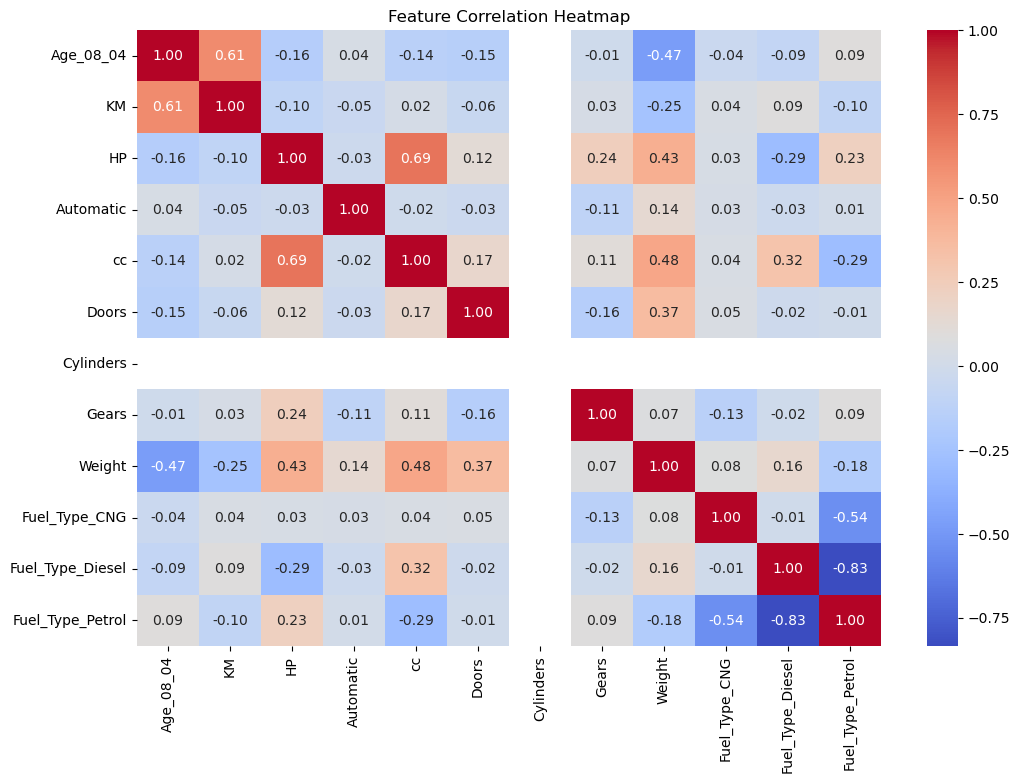

In [976]:
# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**Since there is strong multicollinearity between features 'cc' and 'HP' also, 'Fuel_Type_Petrol and Diesel', we will drop one of each column(feature)**

In [979]:
X = X.drop(columns=['HP', 'Fuel_Type_Diesel'])

In [981]:
X.head()

,Age_08_04,KM,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Petrol
0,27,19700,0,1800,3,4,5,1185,0.0,1.0
1,23,71138,0,1900,3,4,5,1105,0.0,0.0
2,25,31461,0,1800,3,4,6,1185,0.0,1.0
3,22,43610,0,1800,3,4,6,1185,0.0,1.0
4,25,32189,0,1800,3,4,6,1185,0.0,1.0


In [983]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [985]:
X_train

,Age_08_04,KM,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Petrol
12,30,67660,0,1600,3,4,5,1105,0.0,1.0
581,62,80000,0,1600,5,4,5,1075,0.0,1.0
1003,72,71054,1,1300,3,4,5,1045,0.0,1.0
501,53,26624,0,1400,5,4,5,1060,0.0,1.0
318,40,17051,0,1400,5,4,5,1060,0.0,1.0
286,41,29716,0,1600,5,4,5,1075,0.0,1.0
668,59,65463,0,1600,5,4,5,1070,0.0,1.0
988,70,73014,0,1600,5,4,5,1075,0.0,1.0
1068,80,58267,0,1600,5,4,5,1070,0.0,1.0
184,44,60500,0,1600,5,4,5,1075,0.0,1.0


In [987]:
# We will apply scaling to X_train again since we dropped few correlated features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [989]:
X_train_scaled = scaler.fit_transform(X_train)  # Applied on X_train and brought to a ranged scale 

In [991]:
X_test_scaled = scaler.transform(X_test)

**We will continue using Ridge Model**

In [994]:
ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=10)

In [996]:
print("Ridge Coefficients:", ridge.coef_)
print("Ridge Intercept:", ridge.intercept_)

Ridge Coefficients: [-2333.26324487  -416.66154464    96.84411829   159.51819237
    19.0002732      0.           203.57529343   663.83978844
   141.60590682   311.1322993 ]
Ridge Intercept: 10898.956043956045


In [998]:
X.head()

,Age_08_04,KM,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Petrol
0,27,19700,0,1800,3,4,5,1185,0.0,1.0
1,23,71138,0,1900,3,4,5,1105,0.0,0.0
2,25,31461,0,1800,3,4,6,1185,0.0,1.0
3,22,43610,0,1800,3,4,6,1185,0.0,1.0
4,25,32189,0,1800,3,4,6,1185,0.0,1.0


In [1000]:
X = X.drop(columns=['Cylinders'])  # Drop the feature with the zero coefficient
X.head()

,Age_08_04,KM,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Petrol
0,27,19700,0,1800,3,5,1185,0.0,1.0
1,23,71138,0,1900,3,5,1105,0.0,0.0
2,25,31461,0,1800,3,6,1185,0.0,1.0
3,22,43610,0,1800,3,6,1185,0.0,1.0
4,25,32189,0,1800,3,6,1185,0.0,1.0


In [1002]:
# We will train the new X (Feature) column after feature engineering
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# We will apply scaling to X_train again since we dropped a feature with zero Coefficient
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Applied on X_train and brought to a ranged scale 
X_test_scaled = scaler.transform(X_test)

In [1004]:
ridge = Ridge(alpha=10)  # You can adjust alpha as needed
ridge.fit(X_train_scaled, y_train)

# Check the coefficients again
print("Ridge Coefficients:", ridge.coef_)
print("Ridge Intercept:", ridge.intercept_)

Ridge Coefficients: [-2333.26324487  -416.66154464    96.84411829   159.51819237
    19.0002732    203.57529343   663.83978844   141.60590682
   311.1322993 ]
Ridge Intercept: 10898.956043956045


In [1006]:
X

,Age_08_04,KM,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Petrol
0,27,19700,0,1800,3,5,1185,0.0,1.0
1,23,71138,0,1900,3,5,1105,0.0,0.0
2,25,31461,0,1800,3,6,1185,0.0,1.0
3,22,43610,0,1800,3,6,1185,0.0,1.0
4,25,32189,0,1800,3,6,1185,0.0,1.0
5,31,23000,0,1800,3,6,1185,0.0,1.0
6,32,34131,0,1800,3,6,1185,0.0,1.0
7,28,18739,0,1800,3,6,1185,0.0,1.0
8,30,34000,0,1800,3,5,1185,0.0,1.0
9,24,21716,0,1600,3,5,1105,0.0,1.0


In [1012]:
# Sample input with the updated 9 features
sample_input = np.array([8, 10000, 0, 1900, 5, 6, 1050, 0, 1]).reshape(1, -1)

# Ensure to scale the sample input using the same scaler applied to the training data
sample_input_scaled = scaler.transform(sample_input)

# Predict using the updated Ridge model
predicted_value = ridge.predict(sample_input_scaled)

# Print the final predicted price
print("Predicted Price:", predicted_value)

Predicted Price: [19124.27442872]


**Since we are now getting positive predicted values, the adjustments made to tune the Ridge model have successfully stabilized the predictions and resolved the issue of negative values.**

In [1010]:
import warnings
warnings.filterwarnings("ignore")

## Deployment

In [1022]:
import streamlit as st
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [1020]:
# Save trained model and scaler:

model_filename = 'trained_ridge_model.pkl'
scaler_filename = 'scaler.pkl'

with open(model_filename,'wb') as model_file:
    pickle.dump(ridge,model_file)

with open(scaler_filename,'wb') as scaler_file:
    pickle.dump(scaler,scaler_file)